<a href="https://colab.research.google.com/github/ShantanuSinghBankoti/Sentiment-analysis/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [30]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## Importing the dataset

In [31]:
train= pd.read_csv('train_2kmZucJ.csv')
test = pd.read_csv('test_oJQbWVk.csv')
ytrain=train.iloc[:,1].values
combi = train.append(test, sort = False)

In [32]:
combi.head()

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...


In [33]:
combi.count

<bound method DataFrame.count of         id  label                                              tweet
0        1    0.0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1        2    0.0  Finally a transparant silicon case ^^ Thanks t...
2        3    0.0  We love this! Would you go? #talk #makememorie...
3        4    0.0  I'm wired I know I'm George I was made that wa...
4        5    1.0  What amazing service! Apple won't even talk to...
...    ...    ...                                                ...
1948  9869    NaN  #SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...
1949  9870    NaN  Now Available - Hoodie. Check it out here - ht...
1950  9871    NaN  There goes a crack right across the screen. If...
1951  9872    NaN  @codeofinterest as i said #Adobe big time we m...
1952  9873    NaN  Finally I got it .. thanx my father .. #Samsun...

[9873 rows x 3 columns]>

In [34]:
ytrain

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
train.count

<bound method DataFrame.count of         id  label                                              tweet
0        1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1        2      0  Finally a transparant silicon case ^^ Thanks t...
2        3      0  We love this! Would you go? #talk #makememorie...
3        4      0  I'm wired I know I'm George I was made that wa...
4        5      1  What amazing service! Apple won't even talk to...
...    ...    ...                                                ...
7915  7916      0  Live out loud #lol #liveoutloud #selfie #smile...
7916  7917      0  We would like to wish you an amazing day! Make...
7917  7918      0  Helping my lovely 90 year old neighbor with he...
7918  7919      0  Finally got my #smart #pocket #wifi stay conne...
7919  7920      0  Apple Barcelona!!! #Apple #Store #BCN #Barcelo...

[7920 rows x 3 columns]>

In [36]:
test.count

<bound method DataFrame.count of         id                                              tweet
0     7921  I hate the new #iphone upgrade. Won't let me d...
1     7922  currently shitting my fucking pants. #apple #i...
2     7923  I'd like to puts some CD-ROMS on my iPad, is t...
3     7924  My ipod is officially dead. I lost all my pict...
4     7925  Been fighting iTunes all night! I only want th...
...    ...                                                ...
1948  9869  #SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...
1949  9870  Now Available - Hoodie. Check it out here - ht...
1950  9871  There goes a crack right across the screen. If...
1951  9872  @codeofinterest as i said #Adobe big time we m...
1952  9873  Finally I got it .. thanx my father .. #Samsun...

[1953 rows x 2 columns]>

In [37]:
combi.isnull().sum()

id          0
label    1953
tweet       0
dtype: int64

##Removing Twitter Handles (@user)





In [38]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

##Removing Punctuations, Numbers, and Special Characters

In [39]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

##Removing Short Words

In [40]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [41]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https MfQV #andro...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


## Tokenization

##### Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [42]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#fingerprint, #Pregnancy, Test, https, MfQV, ...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this, Would, #talk, #makememories, #unp...
3    [wired, know, George, made, that, #iphone, #cu...
4    [What, amazing, service, Apple, even, talk, ab...
Name: tidy_tweet, dtype: object

## Stemming

###### Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.

In [43]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#fingerprint, #pregnanc, test, http, mfqv, #a...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, thi, would, #talk, #makememori, #unplug...
3    [wire, know, georg, made, that, #iphon, #cute,...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: tidy_tweet, dtype: object

## WordCloud

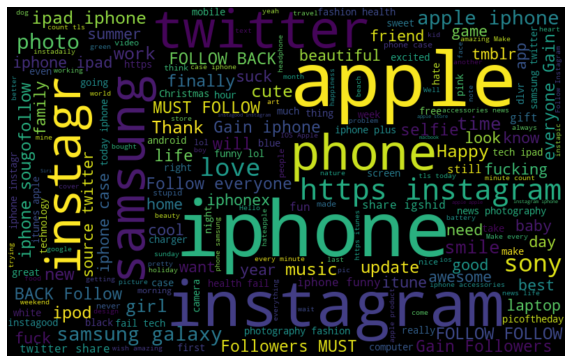

In [44]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



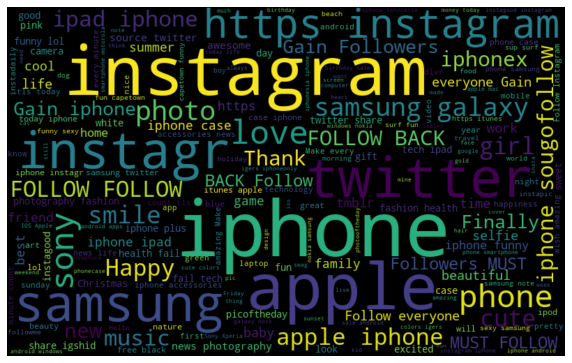

In [45]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

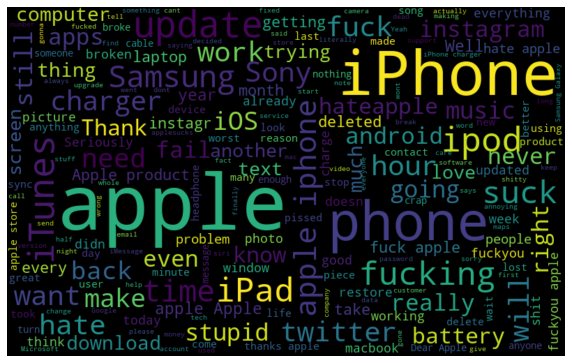

In [46]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Understanding the impact of Hashtags on tweets sentiment



In [47]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [48]:
# extracting hashtags from good tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from bad tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

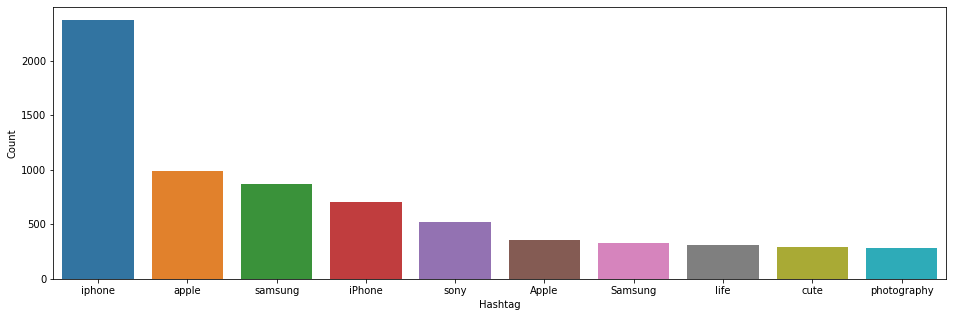

In [49]:
# Good Tweets
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

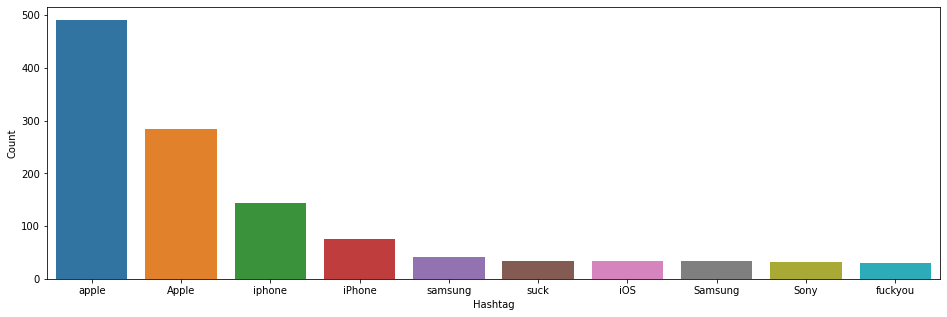

In [50]:
# Bad Tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


##correcting hastag's

In [51]:
for i in range(len(HT_regular)):
  if(HT_regular[i]=='apple'):
    HT_regular[i]='Apple'
  if(HT_regular[i]=='samsung'):
    HT_regular[i]='Samsung'
  if(HT_regular[i]=='iphone'):
    HT_regular[i]='iPhone'

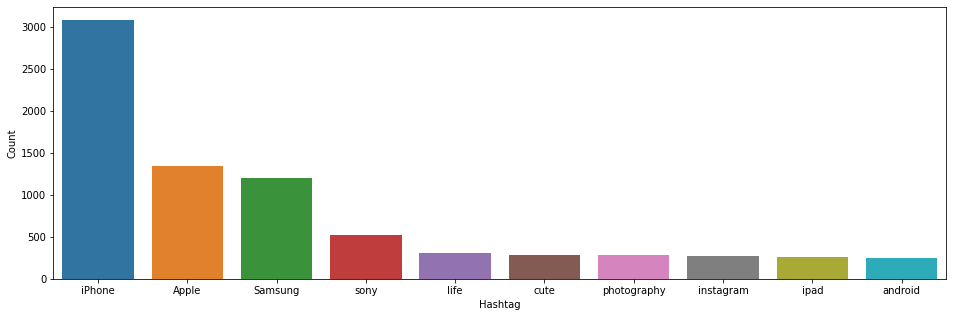

In [52]:
# Good Tweets
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [53]:
for i in range(len(HT_negative)):
  if(HT_negative[i]=='apple'):
    HT_negative[i]='Apple'
  if(HT_negative[i]=='samsung'):
    HT_negative[i]='Samsung'
  if(HT_negative[i]=='iphone'):
    HT_negative[i]='iPhone'
  if(HT_negative[i]=='sony'):
    HT_negative[i]='Sony'


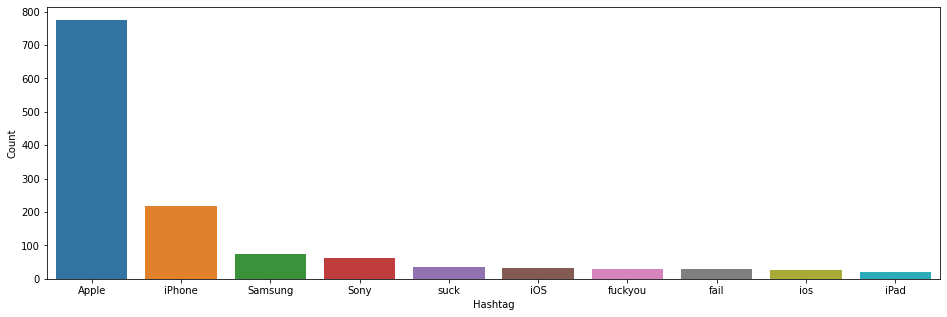

In [54]:
# Bad Tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

##Bag-of-Words Features

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

##Building model using Bag-of-Words features

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:7920,:]
test_bow = bow[7920:,:]

In [57]:
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.7983367983367983

In [58]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False)